In [1]:
import pandas as pd
import numpy as np

In [2]:
dis_sym_df = pd.read_csv('disease_symptoms.csv')
sym_wgh_df = pd.read_csv('Symptom-severity.csv')

In [3]:
dis_sym_df.sort_values('Disease',inplace=True)
sym_wgh_df.sort_values('Symptom',inplace=True)


In [4]:
def clean_word(string):
	s=string.lower().split(' ')
	s = [x for x in s if x != '']
	return ' '.join(s)

In [5]:
dis_sym_df['Disease'] = dis_sym_df['Disease'].apply(clean_word)

In [6]:
dis_sym_df['list_of_symptoms'] = dis_sym_df.agg(list,axis=1)

In [7]:
def remove_nan(lst):
	i=0
	while((len(lst) != i) and (lst[i] is not np.nan)):
		i+=1;

	return lst[:i]

In [8]:
def clean_list(lst):
	for i in range(len(lst)):
		lst[i] = clean_word(lst[i])
	return lst

In [9]:
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(remove_nan)
dis_sym_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms'].apply(clean_list)
dis_sym_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,list_of_symptoms
1186,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
2865,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
1187,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
4136,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."
1188,(vertigo) paroymsal positional vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(vertigo) paroymsal positional vertigo, vomit..."


In [10]:
sym_wgh_df['Symptom'] = sym_wgh_df['Symptom'].apply(clean_word)
sym_wgh_df['Symptom'].drop_duplicates(inplace=True)
sym_wgh_df.set_index('Symptom',inplace=True)
sym_wgh_df.head()

,weight
Symptom,
abdominal_pain,4
abnormal_menstruation,6
acidity,3
acute_liver_failure,6
altered_sensorium,2


In [11]:
symptoms = sym_wgh_df.index.unique()

In [12]:
symptoms_df = pd.DataFrame(columns=symptoms,index=dis_sym_df.index)

In [13]:
symptoms_df['list_of_symptoms'] = dis_sym_df['list_of_symptoms']

In [14]:
func = lambda x: sym_wgh_df.loc[symp,'weight'] if symp in x['list_of_symptoms'] else 0
for symp in symptoms:
    symptoms_df[symp] = symptoms_df.apply(func,axis=1)


In [15]:
symptoms_df.drop('list_of_symptoms',axis=1,inplace=True)

In [16]:
symptoms_df['Disease'] = dis_sym_df['Disease']

In [17]:
symptoms_df.head(10)

Symptom,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
1186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
2865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
1187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
4136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
4792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
3931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
4341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo
3316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) paroymsal positional vertigo


In [18]:
labels=symptoms_df['Disease'].values
# data = symptoms_df.iloc[:,:-1]
data = symptoms_df.set_index('Disease')
data.drop('fluid_overload',axis=1,inplace=True)

In [19]:
data.to_csv("../symptoms-weight.csv")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size=0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)

(4182, 131) (738, 131) (4182,) (738,)


In [22]:
f1 = f1_score(y_test, preds, average='macro') * 100
acu = accuracy_score(y_test, preds)*100
print('F1-score% = ',f1)
print('Accuracy% = ',acu )


F1-score% =  100.0
Accuracy% =  100.0


<AxesSubplot:>

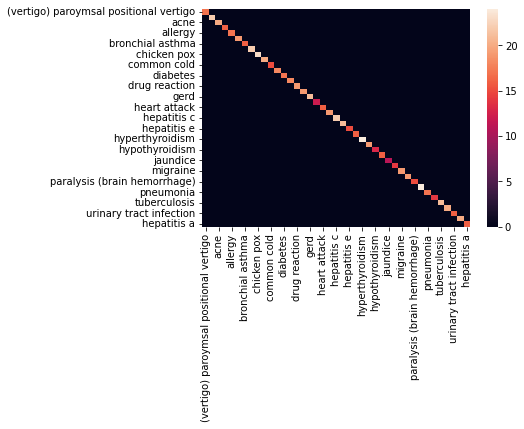

In [23]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=dis_sym_df['Disease'].unique(), columns=dis_sym_df['Disease'].unique())
sns.heatmap(df_cm)


In [24]:
import pickle

with open('../model.pkl','wb') as file:
	pickle.dump(model,file)